# このNoteBookの目的

私の勉強のために、以下の本の内容を私なりにまとめつつ<br>
他の人にも説明できるように内容をまとめていく。<br>

**本：ゼロから作るDeepLearning Pythonで学ぶディープラーニングの理論と実装<br>
著者:斎藤　康穀<br>
出版社　オライリージャパン**

実際にコードを実行できるものに置き換えていくので、<br>
本書を片手に持ち読みながら、このNoteで実際に動かしていくという運用が1番学習できると思われる。

## Python入門　(省略)

基本のため省略

## パーセプトロン (perceptron)

本章では、パーセプトロンについて説明し、パーセプトロンを使って簡単な問題を解いていただきます。<br>
その過程を通して、パーセプトロンに親しんでもらいます。

パーセプトロンはニューラルネットワーク(ディープラーニング)の起源となるアルゴリズムです。<br>
そのため、パーセプトロンの仕組みを学ぶことは、ニューラルネットワークやディープラーニングへと進む上で重要な考え方を学ぶことになります。

### パーセプトロンとは

パーセプトロンは、複数の信号を入力として受け取り、一つの信号を出力します。<br>
ここで言う「信号」とは、電流や川のような「流れ」を持つものをイメージするとよいでしょう。<br>
電流が導線を流れ、電子を先に送り出すように、パーセプトロンの信号も流れを　作り、情報を先へと伝達していきます。<br>
ただし、実際の電流とは違い、パーセプトロンの信号は「流す/流さない」の2値の値です。<br>
本書では０を「信号を流さない」、1を「信号を流す」に対応させて考えます。

##### 図2-1 2入力のパーセプトロン
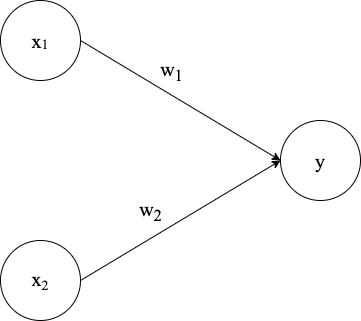

図2-1は2つの信号を入力として受け取るパーセプトロンの例を示しています。<br>
$x_1$,$x_2$は入力信号、$y$は出力信号、$w_1,w_2$は重みを表します。<br>
図の◯は「ニューロン」や「ノード」と呼ばれます。<br>
入力信号は、ニューロンに送られる際に、それぞれに固有の重みが乗算されます。<br>
ニューロンでは、送られてきた信号の総和が計算され、その総和がある限界値を超えた場合にのみ１を出力します。 (これをニューロンが発火すると表現する場合もあります。)<br>
ここでは、その限界値を**閾値**とよび$\theta$と言う記号で表すことにします。<br>


パーセプトロンの原理は、たったこれだけです。
以上のことを数式で表すと次の式(2.1)のようになります。

##### 式2.1
$$
    y =
        \begin{cases}
            0 \quad (w_1x_1 + w_2x_2 \leqq \theta) \\
            1 \quad (w_1x_1 + w_2x_2 > 	\theta) \\
        \end{cases}
$$

パーセプトロンは、複数ある入力信号のそれぞれに固有の重みを持ちます。
<br>そしてその重みは、各信号の重要性をコントロールする要素として働きます。
<br>つまり、その重みが大きければ大きいほど、その重みに対応する信号の重要性が高くなるのです。

### 単純な論理回路

ANDゲート,ORゲート,NANDゲートを考えるがあまり重要ではないため、省略
結論だけ記載する。

- ANDゲート　： $(w_1,w_2,\theta) =(0.5,0.5,0.7)$<br>
    他にも組み合わせは無限に存在する。組み合わせの条件は $w_1+w_2 > \theta　and　w_1 < 	\theta　and　w_2 < \theta$ である。
- NANDゲート : $(w_1,w_2,\theta) =(-0.5,-0.5,-0.7)$<br>
    ANDゲートの組み合わせにマイナスをかけることで完成する
- ORゲート :$(w_1,w_2,\theta) =(1,1,0.5)$<br>
    他にも組み合わせは無限に存在する。組み合わせの条件は $w_1 > \theta　and　w_2 > \theta$ である。

コラム：　
ここでパーセプトロンのパラメータを決めているのは、コンピュータではなく私たち人間です。真理値表という「学習データ」を見ながら、人の手によってパラメータの値を考えました。 <br>
機械の問題では、このパラメータの値を決める作業をコンピュータに自動で行わせます。学習とは、適切なパラメータを決める作業であり、人が行う仕事は、パーセプトロンの構造を考え、コンピュータに学習データを与えることになります。<br>

### パーセプトロンの実装

#### 簡単な実装

それでは、先の論理回路をPythonで実装しましょう。<br>
ここでは、引数として$x_1$と$x_2$を受け取るANDという関数を定義します。

In [13]:
def AND(x1,x2):
    w1,w2,theta = 0.5,0.5,0.7 #ANDゲートのw1,w2,$\theta$を入力
    tmp = x1*w1+x2*w2  # 式2.1の条件式に代入
    if tmp <= theta: # 条件式を評価
        return 0
    elif tmp > theta:
        return 1

In [10]:
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


期待した通りの出力になっています。
<br>これで ANDゲートは実現することができました。<br>
同様の手順でNANDゲートやORゲートを実装することができますが、ここでは、実装に少しだけ手を加えたいと思います。